# Pixel intensities from a color image with SNS pair plot
When completing the Data camp 'introduction to data visualization with python' course section on 'analyzing time series and images', I wondered what a color image's pixel intensities would look like when plotted using a seaborn pair plot. So decided to create this notebook to find out.

Inspired by this exercise: https://campus.datacamp.com/courses/introduction-to-data-visualization-with-python/analyzing-time-series-and-images?ex=15

Starting with the required imports and loading the image being analyzed:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image (same as used in the excersize)
image = plt.imread('hs-2004-32-b-small_web.jpg')

The exercise is to plot 2D histograms of each color channel against another color prior to considering rescaling them to enhance the image. Here is the exersize with the original image added as the 4th subplot:

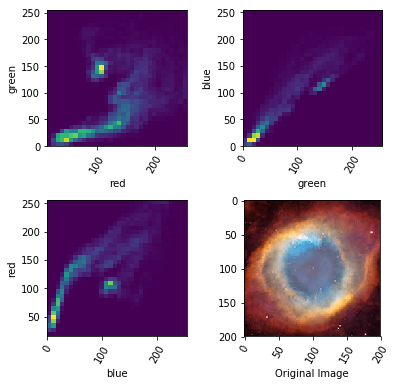

In [23]:
plt.rcParams["figure.figsize"] = (6,6)

# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')
plt.imshow(image)

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Adding the original image as the 4th subplot
plt.subplot(2,2,4)
plt.imshow(image)
plt.xticks(rotation=60)
plt.xlabel('Original Image')

# Adding a little more space between subplots to allow axis labels to show
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

Now seeing what happens if I build a pandas dataframe with the pixel intensity arrays and pairplot that.

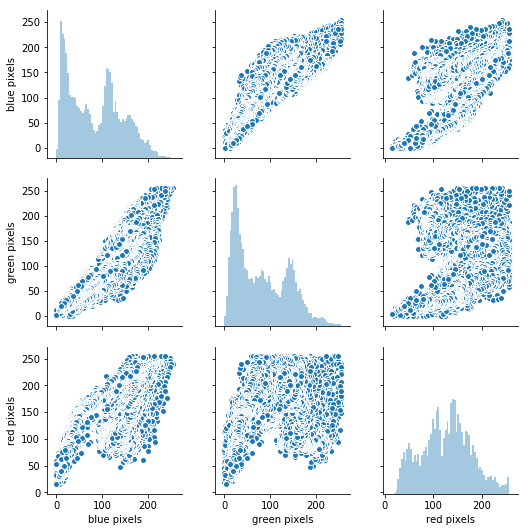

In [24]:
# Build my DataFrame
df = pd.DataFrame({'red pixels':red_pixels, 'green pixels':green_pixels, 'blue pixels':blue_pixels})
# create and show the pairplot()
sns.pairplot(df, diag_kws=dict(alpha=0.4, bins=64))
plt.show()

By compairing with the heatmaps above and the prior exersize (which shows straight histomgrams of the pixels intensities) below you can see that the on diagonal images are correct however the off diagonal images although correct are not as powerful as the heatmaps would be.

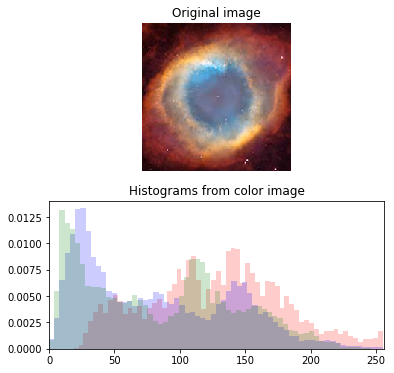

In [4]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()

Using a bit of google magic you can make the histograms happen although it means using the seaborn PairGrid class instead of the slightly simpler sns.pairplot function, as the Seaborn color key word argument needs special handling.

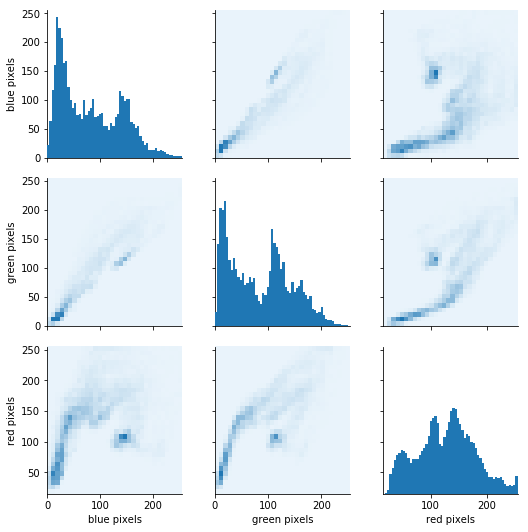

In [11]:
# Creating my grid
grid = sns.PairGrid(df)
# Setting the diagonal plot characteristics
grid.map_diag(plt.hist, bins=60)

# A simple wrapping function to create the desired plots for each spot off diagonal
def pairgrid_heatmap(x, y, **kwargs):
    # Map any provided color key word to a cmap blending from 'light' to 'color'
    cmap = sns.light_palette(kwargs.pop("color"), as_cmap=True)
    # creating the desired plot with kwargs
    plt.hist2d(x, y, cmap=cmap, **kwargs)

# Setting the off diagonal plot characteristics, pointing to our wrapping function
grid.map_offdiag(pairgrid_heatmap, bins=32)

# Thanks to https://stackoverflow.com/questions/43924280/pair-plot-with-heat-maps-possibly-logarithmic

Using cmin to prevent 0's from being given any color makes the heatmap() look even nicer
I'll also confirm that the color handling works a charm:

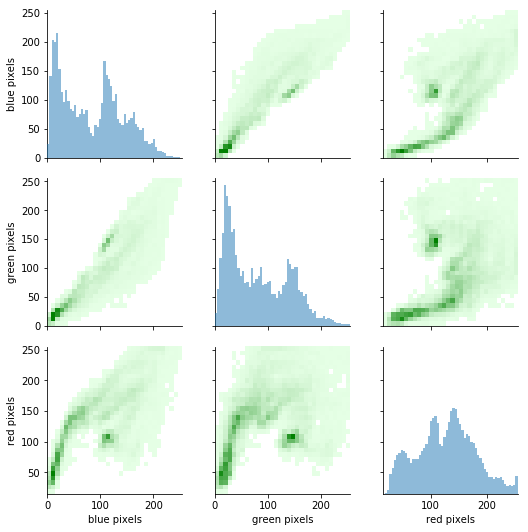

In [29]:
grid = sns.PairGrid(df)
grid.map_diag(plt.hist, bins=60, alpha=0.5)

def pairgrid_heatmap(x, y, **kwargs):
    cmap = sns.light_palette(kwargs.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kwargs)

grid.map_offdiag(pairgrid_heatmap, bins=32, color='green')